In [ ]:
import numpy as np

## Modeling Arms

In [ ]:
def bandit(adver,level):
    reward=0
    held_cost=0
    if(adver=='SN'):
      const_cost=2
      if(level=='junior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.8):
          held=1
          held_cost = 80
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='mid'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.5):
          held=1
          held_cost = 60
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='senior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.2):
          held=1
          held_cost = 30
          benef= hire(level)
          reward+=benef
        else:
          held=0
    elif(adver=='EA'):
      const_cost=14
      if(level=='junior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.3):
          held=1
          held_cost = 80
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='mid'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.5):
          held=1
          held_cost = 60
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='senior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.7):
          held=1
          held_cost = 30
          benef= hire(level)
          reward+=benef
        else:
          held=0
    elif(adver=='JA'):
      const_cost=10
      if(level=='junior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.5):
          held=1
          held_cost = 80
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='mid'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.6):
          held=1
          held_cost = 60
          benef= hire(level)
          reward+=benef
        else:
          held=0

      if(level=='senior'):
        prob = np.random.uniform(0, 1)
        if(prob<=0.8):
          held=1
          held_cost = 30
          benef= hire(level)
          reward+=benef
        else:
          held=0
    return reward-held_cost-const_cost

In [ ]:
def hire(level):
  reward=0
  for i in range(0,10):
    prob = np.random.uniform(0, 1)
    if(level=='junior'):
      if(prob<=0.7):
        reward+=27
    if(level=='mid'):
      if(prob<=0.5):
        reward+=26
    if(level=='senior'):
      if(prob<=0.3):
        reward+=25
  return reward

In [ ]:
def get_element(matrix, index):  ## Asked from GPT
    rows, cols = matrix.shape
    flat_index = index % (rows * cols)
    row = flat_index // cols
    col = flat_index % cols
    return row, col

In [ ]:
def num_to_action(num):
  if(num==0):
    advert='SN'
    level='junior'
  elif(num==3):
    advert='SN'
    level='mid'
  elif(num==6):
    advert='SN'
    level='senior'
  elif(num==1):
    advert='EA'
    level='junior'
  elif(num==4):
    advert='EA'
    level='mid'
  elif(num==7):
    advert='EA'
    level='senior'
  elif(num==2):
    advert='JA'
    level='junior'
  elif(num==5):
    advert='JA'
    level='mid'
  elif(num==8):
    advert='JA'
    level='senior'
  return advert,level


##Finding opt. Action and Delta

In [ ]:
reward=0
all_rewards = []
arms = [['SN','EA','JA'],['junior','mid','senior']]
for j in range(0,len(arms[0])):
  for k in range(0,len(arms[1])):
    reward=0
    for i in range(0,1000):
      reward+=bandit(arms[0][k],arms[1][j])
    all_rewards.append(reward/1000)



delta_i = []
for i in range(9):
    diff = max(all_rewards) - all_rewards[i]
    delta_i.append(diff)
delta_i

[0.0,
 63.024,
 37.981,
 49.813,
 62.93300000000001,
 50.259,
 76.312,
 63.20700000000001,
 56.532000000000004]

##Initializing UBC

In [ ]:
def init_UCB(Q_mean,action_numbers):
  init_one=0
  reward = 0
  if(np.any(Q_mean==0)):
      row_zero = np.where(Q_mean==0)[0][0]
      col_zero = np.where(Q_mean==0)[1][0]
      action = row_zero+col_zero
      advert,level = num_to_action(action)
      reward = bandit(advert,level)
      row=row_zero
      col=col_zero
      Q_mean,action_numbers = update_action(Q_mean,reward,row,col,action_numbers)
  else:
    init_one=1
  return Q_mean,action_numbers,init_one,reward



##UBC Take Action

In [ ]:
def take_action_UCB(Q_mean,action_numbers,i):
    Q_mean_copy = np.copy(Q_mean)
    for k in range(3):
      for j in range(3):
        Q_mean_copy[k][j] = Q_mean_copy[k][j]+2*np.sqrt(np.sum(action_numbers)/action_numbers[k][j])
      index_of_max = np.argmax(Q_mean_copy)

      advert,level = num_to_action(index_of_max)
      reward = bandit(advert,level)
      row,col = get_element(Q_mean, index_of_max)
      Q_mean,action_numbers = update_action(Q_mean,reward,row,col,action_numbers)
      return Q_mean,action_numbers,reward

##EPS greedy Take Action

In [ ]:
def take_action(Q_mean,action_numbers):
  prob = np.random.uniform(0, 1)
  if(prob<0.1):
    action = np.random.randint(0, 9)
    advert,level = num_to_action(action)
    reward = bandit(advert,level)
    row,col = get_element(Q_mean, action)
    Q_mean,action_numbers = update_action(Q_mean,reward,row,col,action_numbers)

  else:
    index_of_max = np.argmax(Q_mean)
    advert,level = num_to_action(index_of_max)
    reward = bandit(advert,level)
    row,col = get_element(Q_mean, index_of_max)
    Q_mean,action_numbers = update_action(Q_mean,reward,row,col,action_numbers)

  return Q_mean,action_numbers,reward

## Regret

In [ ]:
def regret_t(results,delta_i):
  regret = []
  for i in range(520):
    num_actions = 0
    for k in range(399):
      num_actions+=results[i+520*k][0:9]
    regret_temp = np.dot(np.array(num_actions),np.array(delta_i))
    regret.append(regret_temp/400)
  return regret

## Reward

In [ ]:
def reward_(results):
  horizon_reward = []
  for i in range(520):
    temp_horizon = 0
    for k in range(399):
      temp_horizon+=results[i+520*k][9]
    horizon_reward.append(temp_horizon/400)
    # print(horizon_reward)
  return horizon_reward

## Update Q_values

In [ ]:
def update_action(Q_mean,reward,row,col,action_numbers):
  action_numbers[row][col]+=1
  Q_mean[row][col] = Q_mean[row][col]+(reward-Q_mean[row][col])/(action_numbers[row][col])
  return Q_mean,action_numbers

##UCB Algorithm

In [ ]:
results_UCB = np.array([])
for j in range(400):
    Q_mean = np.zeros((3,3))
    action_numbers = np.zeros((3,3))
    for i in range(520):
      Q_mean,action_numbers,init_one,reward = init_UCB(Q_mean,action_numbers)
      if(init_one==1):
        Q_mean,action_numbers,reward = take_action_UCB(Q_mean,action_numbers,i)
      list1 = action_numbers.reshape(1,9).tolist()[0]
      list2 = reward
      one_horizon = list1+[list2]
      temp = np.array(one_horizon)
      if results_UCB.size==0:
        results_UCB=temp
      else:
        results_UCB = np.vstack((results_UCB, temp))

## EPS greedy Algorithm

In [ ]:
results_EPSG = np.array([])
for j in range(400):
  Q_mean = np.zeros((3,3))
  action_numbers = np.zeros((3,3))
  for i in range(520):
    Q_mean,action_numbers,reward = take_action(Q_mean,action_numbers)
    list1 = action_numbers.reshape(1,9).tolist()[0]
    list2 = reward
    one_horizon = list1+[list2]
    temp = np.array(one_horizon)
    if results_EPSG.size==0:
      results_EPSG=temp
    else:
      results_EPSG = np.vstack((results_EPSG, temp))

##Plot Reward

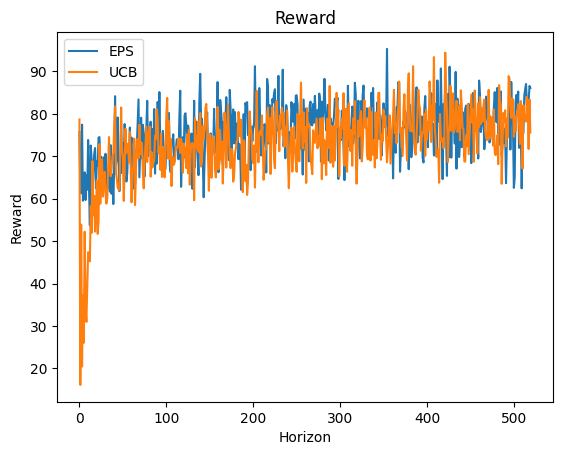

In [ ]:
import matplotlib.pyplot as plt
horizon_reward_EPSG = reward_(results_EPSG)
horizon_reward_UCB = reward_(results_UCB)
plt.plot(horizon_reward_EPSG)
plt.plot(horizon_reward_UCB)
plt.legend(['EPS','UCB'])
plt.xlabel('Horizon')
plt.ylabel('Reward')
plt.title('Reward')
plt.show()


## Plot Regret

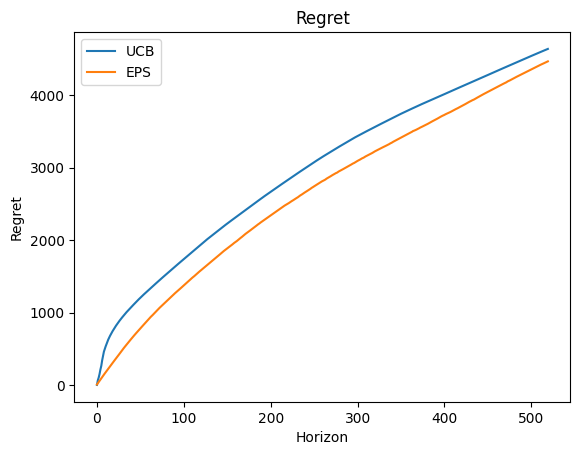

In [ ]:
regret_UCB = regret_t(results_UCB,delta_i)
regret_EPSG = regret_t(results_EPSG,delta_i)
plt.plot(regret_UCB)
plt.plot(regret_EPSG)
plt.legend(['UCB','EPS'])
plt.xlabel('Horizon')
plt.ylabel('Regret')
plt.title('Regret')
plt.show()
